## Predicting the optimim number of clusters present in the give 'iris' dataset.

We have been given an 'iris' dataset. This dataset is about a flower called as iris. The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of each of the three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

### Model:

Our aim is to predict the minimum number of clusters and represent these clusters using a classification ML algorithm. There are several classification algorithm  which can be used, I have used K-means clustering algorithm for this task.

#### What is K-Means Clustering?
K-Means clustering is an unsupervised classical machine learning algorithm that classifies targets by clusters of aggregated datapoints resulting from certain similarities within the features. As mentioned, K-Means is an unsupervised algorithm hence the model will be trying to understand the data and draw out valuable or informative features and reveal patterns within the dataset.

##### How K-Means Clustering works: 
The K in K-Means clustering is actually a variable that stands for the number of centroids — points at the center of clusters. Beginning with initialization, K-Means calculates the distances between the datapoints and the number of centroids (k), and then groups each datapoint under the centroid that it is closest to.

Then, the centroid is recalculated, the formula for the new centroids are as follows:

sum of points grouped to centroid / number of points in group

This process continues until all datapoints are grouped into their respective clusters and there is no changes in the classes of any of the datapoints.

In [27]:
#importing the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

### Data Reading and Exploring

In [4]:
#Reading the given data-set.
data= pd.read_csv('Iris.csv')

print("Dataset Imported")
data.head(5)

Dataset Imported


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#Checking the number of columns and rows in the dataset.
data.shape

(150, 6)

In [7]:
#Useful info about the dataset.
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
#Checking for null values.
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Hence, there are no null values present in our dataset.

In [15]:
#Checking for imbalance classses.
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

This proves that there are equal number data from each of the Iris species.

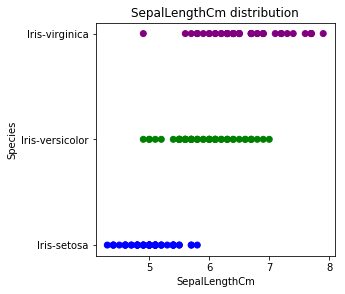

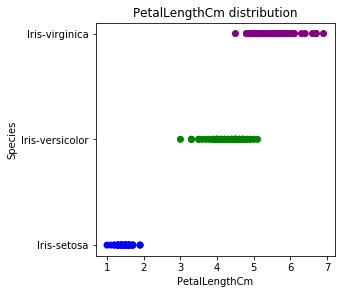

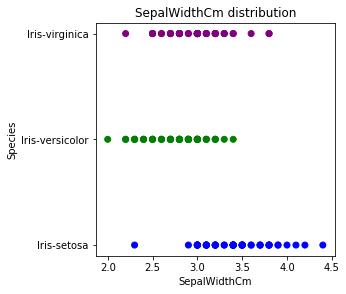

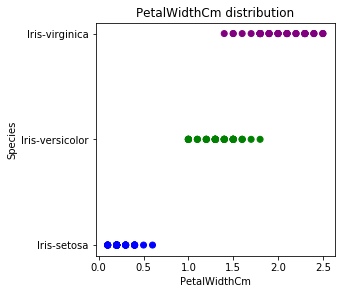

In [19]:
#Plot distributions against features

colors = {"Iris-virginica":"purple", "Iris-setosa": "blue", "Iris-versicolor":"green"}

def showDistributions(feature1):
    plt.figure(figsize=(30,30))
    plt.subplot(6,6,1)
    plt.scatter(data[feature1], data['Species'], c=data['Species'].map(colors))
    plt.title("{} distribution".format(feature1))
    plt.xlabel(feature1)
    plt.ylabel('Species')
    plt.show()
    
showDistributions('SepalLengthCm')
showDistributions('PetalLengthCm')
showDistributions('SepalWidthCm')
showDistributions('PetalWidthCm')

We can conclude from the above plots that, every species have different sepal and petal lengths and widths.

In [22]:
x=data.drop(['Species'],axis=1)
y=data['Species']

In [23]:
print("Features")
print(x)

Features
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
5      6            5.4           3.9            1.7           0.4
6      7            4.6           3.4            1.4           0.3
7      8            5.0           3.4            1.5           0.2
8      9            4.4           2.9            1.4           0.2
9     10            4.9           3.1            1.5           0.1
10    11            5.4           3.7            1.5           0.2
11    12            4.8           3.4            1.6           0.2
12    13            4.8           3.0            1.4           0.1
13    14            4.3           3.0            1.1 

In [24]:
print("Target/Classes")
print(y)

Target/Classes
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virgi

Calculating the optimum number of clusters.


In [34]:
sum_of_squared_distances=[]
K=range(1,10)
optimalK=1
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(x)
    sum_of_squared_distances.append(km.inertia_)
    if k>1:
        ratio =sum_of_squared_distances[k-1]/sum_of_squared_distances[k-2]
        if ratio <0.55:
            optimalK= k

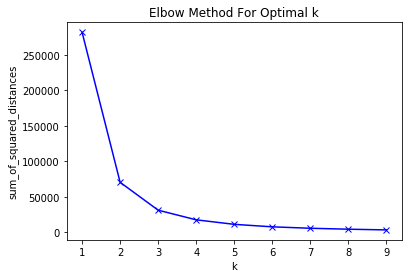

In [35]:
plt.plot(K, sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the above graph we can infer that the optimal number of clusters is given by the sharp turn in the Elbow graph. In this case, the optimal number is 3.

Text(0.5, 1.0, 'scatter')

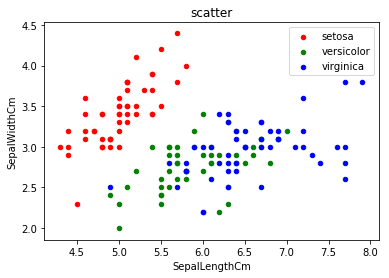

In [38]:
#Visualsing the iris dataset.

ax = data[data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")